In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from config_weather import weather_api_key

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#adding date to convert data whenever doing analysis of plots
today = pd.Timestamp("today").strftime("%m/%d/%Y")

In [4]:
from citipy import citipy

In [5]:
# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [7]:
#setting up test city
#so layed out one city set to get the specific directions to draw that specific data out as shown below
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
num_city = 0
set_num = 1
name_of_city = cities[0]

query_url = f'{url}appid={weather_api_key}&q={name_of_city}&units={units}'
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

#want: city, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": -34.4187,
        "lon": 19.2345
    },
    "dt": 1612674939,
    "id": 3366880,
    "main": {
        "feels_like": 63.07,
        "humidity": 94,
        "pressure": 1015,
        "temp": 64.99,
        "temp_max": 64.99,
        "temp_min": 64.99
    },
    "name": "Hermanus",
    "sys": {
        "country": "ZA",
        "id": 2006131,
        "sunrise": 1612670993,
        "sunset": 1612719874,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 173,
        "speed": 11.48
    }
}


In [8]:
print(f'Beginning Data Retrieval')     
print(f'-----------------------------')

#making lists of data
cities_names = []
list_Lat = []
list_Lng = []
max_temps = []
list_of_humidity = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

#from there, we want to go through each city in the list of cities
#withdraw data for each city in query_url
for city in cities:
    try:
        name_of_city = city
        query_url = f'{url}appid={weather_api_key}&q={name_of_city}&units={units}'
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
#collecting Lat of specific city in cities       
        Lat = weather_json['coord']['lat']
       
#collecting Lng of specific city in cities
        Lng = weather_json['coord']['lon']
    
#collecting max temp of specific city in cities
        temp = weather_json['main']['temp_max']
       
#collecting humidity of specific city in cities
        humidity = weather_json['main']['humidity']
      
#collecting cloudiness of specific city in cities
        clouds = weather_json['clouds']['all']
        
#collecting wind speed of specific city in cities
        wind = weather_json['wind']['speed']
        
#collecting country of specific city in cities
        country = weather_json['sys']['country']
       
#collecting date of specific city in cities
        date = weather_json['dt']
        
        cities_names.append(name_of_city)
        list_Lat.append(Lat)
        list_Lng.append(Lng)
        max_temps.append(temp)
        list_of_humidity.append(humidity)
        cloudiness.append(clouds)
        wind_speeds.append(wind)
        countries.append(country)
        dates.append(date)
        
        print(f'Processing Record {num_city} of Set {set_num} |{city}')

        num_city = num_city + 1
        if num_city >= 50:
            num_city = 0
            set_num = set_num + 1
        
    except:
        bold = '\033[1m not \033[0m'
        print(f'City {bold} found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 |hermanus
Processing Record 1 of Set 1 |cabo san lucas
Processing Record 2 of Set 1 |avarua
Processing Record 3 of Set 1 |libohove
Processing Record 4 of Set 1 |saint-philippe
Processing Record 5 of Set 1 |aguimes
Processing Record 6 of Set 1 |port augusta
City  not  found. Skipping...
Processing Record 7 of Set 1 |cidreira
Processing Record 8 of Set 1 |butaritari
Processing Record 9 of Set 1 |vaini
Processing Record 10 of Set 1 |rikitea
Processing Record 11 of Set 1 |anadyr
Processing Record 12 of Set 1 |tasiilaq
Processing Record 13 of Set 1 |bengkulu
Processing Record 14 of Set 1 |kaitangata
Processing Record 15 of Set 1 |nikolskoye
Processing Record 16 of Set 1 |jamestown
Processing Record 17 of Set 1 |thompson
Processing Record 18 of Set 1 |nemuro
Processing Record 19 of Set 1 |kapaa
Processing Record 20 of Set 1 |elko
Processing Record 21 of Set 1 |saskylakh
Processing Record 22 of Set 1 |cherskiy

Processing Record 38 of Set 4 |charters towers
Processing Record 39 of Set 4 |xuddur
Processing Record 40 of Set 4 |okhotsk
Processing Record 41 of Set 4 |berlevag
City  not  found. Skipping...
Processing Record 42 of Set 4 |grindavik
Processing Record 43 of Set 4 |mount gambier
Processing Record 44 of Set 4 |markivka
Processing Record 45 of Set 4 |rochegda
Processing Record 46 of Set 4 |touros
Processing Record 47 of Set 4 |gao
Processing Record 48 of Set 4 |kendal
Processing Record 49 of Set 4 |tiksi
Processing Record 0 of Set 5 |chokurdakh
Processing Record 1 of Set 5 |bandarbeyla
Processing Record 2 of Set 5 |chioggia
Processing Record 3 of Set 5 |swan hill
City  not  found. Skipping...
Processing Record 4 of Set 5 |edmonds
Processing Record 5 of Set 5 |yatou
Processing Record 6 of Set 5 |jutai
Processing Record 7 of Set 5 |baiquan
Processing Record 8 of Set 5 |san patricio
Processing Record 9 of Set 5 |upernavik
Processing Record 10 of Set 5 |tuktoyaktuk
Processing Record 11 of Se

Processing Record 31 of Set 8 |kabanjahe
Processing Record 32 of Set 8 |tirthahalli
Processing Record 33 of Set 8 |morant bay
Processing Record 34 of Set 8 |richards bay
Processing Record 35 of Set 8 |moba
Processing Record 36 of Set 8 |los llanos de aridane
Processing Record 37 of Set 8 |pisco
Processing Record 38 of Set 8 |luderitz
City  not  found. Skipping...
Processing Record 39 of Set 8 |new glasgow
Processing Record 40 of Set 8 |yichang
Processing Record 41 of Set 8 |uusikaupunki
Processing Record 42 of Set 8 |virtsu
Processing Record 43 of Set 8 |doha
Processing Record 44 of Set 8 |songjianghe
Processing Record 45 of Set 8 |neiafu
Processing Record 46 of Set 8 |amapa
City  not  found. Skipping...
Processing Record 47 of Set 8 |hirara
Processing Record 48 of Set 8 |chapleau
Processing Record 49 of Set 8 |rincon
Processing Record 0 of Set 9 |anori
Processing Record 1 of Set 9 |brae
Processing Record 2 of Set 9 |naze
Processing Record 3 of Set 9 |marsaxlokk
Processing Record 4 of 

Processing Record 21 of Set 12 |hit
Processing Record 22 of Set 12 |rabo de peixe
Processing Record 23 of Set 12 |san quintin
City  not  found. Skipping...
Processing Record 24 of Set 12 |constantine
Processing Record 25 of Set 12 |baghdad
Processing Record 26 of Set 12 |kapuskasing
Processing Record 27 of Set 12 |ararat
Processing Record 28 of Set 12 |jalu
Processing Record 29 of Set 12 |kutum


In [9]:
#convert data into dataframe
data = {'City': cities_names,
        'Lat': list_Lat,
        'Lng': list_Lng,
        'Max_Temp': max_temps,
        'Humidity': list_of_humidity,
        'Cloudiness': cloudiness,
        'Wind_Speed': wind_speeds,
        'Country': countries,
        'Date': dates}

#making dataframe
weather_df = pd.DataFrame(data)

#giving name to index for csv file header
weather_df.index.names = ['City_ID']
weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,64.99,94,98,11.48,ZA,1612674939
1,cabo san lucas,22.8909,-109.9124,64.40,59,20,5.75,MX,1612674989
2,avarua,-21.2078,-159.7750,82.40,74,7,11.50,CK,1612674485
3,libohove,40.0311,20.2631,59.00,100,20,4.85,AL,1612675020
4,saint-philippe,-21.3585,55.7679,84.20,70,0,8.05,RE,1612675020
...,...,...,...,...,...,...,...,...,...
575,baghdad,33.3406,44.4009,55.40,94,75,6.91,IQ,1612675057
576,kapuskasing,49.4169,-82.4331,-11.20,77,30,3.44,CA,1612675235
577,ararat,39.8317,44.7049,28.40,93,0,1.14,AM,1612675235


In [10]:
#create csv file of above dataframe
weather_df.to_csv(output_data_file, index = True, header = True)

In [11]:
#retrieval of information into summary dataframe
#adjusted dataframe to include all index values, but not the 'City' column
adjusted_df = weather_df.loc[:, weather_df.columns != 'City']

#retrieving data for all columns in new dataframe
count = adjusted_df.count()
mean = adjusted_df.mean()
std = adjusted_df.std()
min_values = adjusted_df.min()
one_quantile = adjusted_df.quantile(.25)
two_quantile = adjusted_df.quantile(.5)
three_quantile = adjusted_df.quantile(.75)
max_values = adjusted_df.max()

#making dataframe
index_name = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
analy_data = [count, mean, std, min_values, one_quantile, two_quantile, three_quantile, max_values]
compiled_weather_df = pd.DataFrame(analy_data, columns = ['Lat', 'Lng', 'Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Date'], index = index_name)
compiled_weather_df

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.192791,20.367951,51.010017,73.006897,52.744828,8.427466,1.612675e+09
std,32.795327,89.435364,31.707646,19.592479,38.301915,5.948052,1.240755e+02
min,-54.800000,-175.200000,-43.010000,15.000000,0.000000,0.400000,1.612674e+09
25%,-6.924675,-62.217350,33.610000,64.000000,15.750000,3.922500,1.612675e+09
50%,22.458300,25.328300,61.815000,77.000000,58.000000,6.910000,1.612675e+09
75%,46.446375,101.454875,74.290000,88.000000,90.000000,11.500000,1.612675e+09
max,78.218600,178.416700,100.990000,100.000000,100.000000,35.680000,1.612675e+09


In [12]:
#removing data with cities that have humidity > 100%
index_names = weather_df[weather_df['Humidity'] > 100].index 

#displaying indices of cities with humidity over 100%
index_names

Int64Index([], dtype='int64', name='City_ID')

In [13]:
clean_city_data = weather_df.drop(index_names, inplace = False)
clean_city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,64.99,94,98,11.48,ZA,1612674939
1,cabo san lucas,22.8909,-109.9124,64.40,59,20,5.75,MX,1612674989
2,avarua,-21.2078,-159.7750,82.40,74,7,11.50,CK,1612674485
3,libohove,40.0311,20.2631,59.00,100,20,4.85,AL,1612675020
4,saint-philippe,-21.3585,55.7679,84.20,70,0,8.05,RE,1612675020
...,...,...,...,...,...,...,...,...,...
575,baghdad,33.3406,44.4009,55.40,94,75,6.91,IQ,1612675057
576,kapuskasing,49.4169,-82.4331,-11.20,77,30,3.44,CA,1612675235
577,ararat,39.8317,44.7049,28.40,93,0,1.14,AM,1612675235


This code is taking the data from specific columns (Lat and Max_Temp) in the dataframe. It then utilizez matplotlib to create a scatterplot and uses the y axis to create a color gradient.


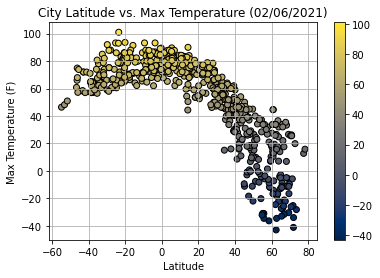

In [14]:
#latitude vs temp plot
x = clean_city_data['Lat']
y = clean_city_data['Max_Temp']
t = y
lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_temp_plot.png'
plt.savefig(output_data_file)

#add code observation
lat_temp_observ = 'This code is taking the data from specific columns (Lat and Max_Temp) in the dataframe. It then utilizez matplotlib to create a scatterplot and uses the y axis to create a color gradient.'
print(lat_temp_observ)

This code is doing a similar thing as the previous code is, except with different columns (Lat and Humidity). It also is using a different color map.


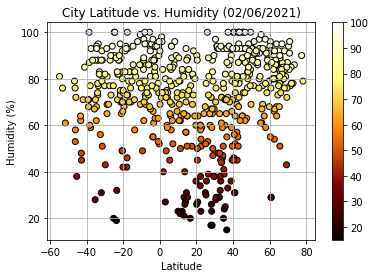

In [15]:
#latitude vs humidity plot
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
t = y
lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_humidity_plot.png'
plt.savefig(output_data_file)

#add code observation
lat_humid_observ = 'This code is doing a similar thing as the previous code is, except with different columns (Lat and Humidity). It also is using a different color map.'
print(lat_humid_observ)

Once again using similar process as the earlier scatterplots, simply with different columns (Lat and Cloudiness) and a different cmap.


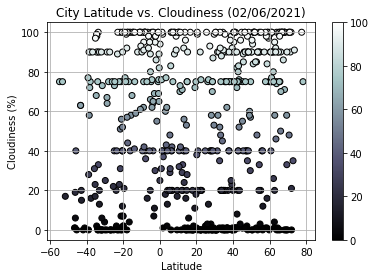

In [16]:
#latitude vs cloudiness plot
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
t = y
lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_cloudiness_plot.png'
plt.savefig(output_data_file)

#add code observation
lat_cloud_observ = 'Once again using similar process as the earlier scatterplots, simply with different columns (Lat and Cloudiness) and a different cmap.'
print(lat_cloud_observ)

Same coding process, different x and y based on specific columns (Lat and Wind_Speed) in dataframe. Used matplotlibs and applied different cmap.


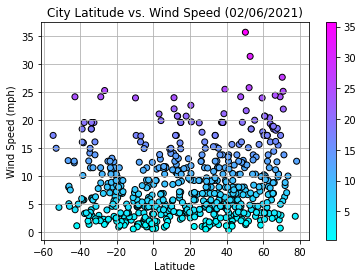

In [17]:
#latitude vs wind speed plot
x = clean_city_data['Lat']
y = clean_city_data['Wind_Speed']
t = y
lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_wind_speed_plot.png'
plt.savefig(output_data_file)

#add code observation
lat_wind_observ = 'Same coding process, different x and y based on specific columns (Lat and Wind_Speed) in dataframe. Used matplotlibs and applied different cmap.'
print(lat_wind_observ)

In [18]:
#Northern Hemisphere
#finding southern hemisphere values
southern_hemisphere = clean_city_data[clean_city_data['Lat'] < 0].index 
print(southern_hemisphere)

#dropping southern values
north_data = clean_city_data.drop(southern_hemisphere, inplace = False)
north_data

Int64Index([  0,   2,   4,   6,   7,   9,  10,  13,  14,  23,
            ...
            540, 541, 547, 552, 553, 556, 566, 568, 569, 570],
           dtype='int64', name='City_ID', length=183)


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
1,cabo san lucas,22.8909,-109.9124,64.40,59,20,5.75,MX,1612674989
3,libohove,40.0311,20.2631,59.00,100,20,4.85,AL,1612675020
5,aguimes,27.9054,-15.4461,60.01,72,40,11.50,ES,1612675020
8,butaritari,3.0707,172.7902,80.96,80,60,21.09,KI,1612674941
11,anadyr,64.7500,177.4833,-13.00,84,0,6.71,RU,1612675023
...,...,...,...,...,...,...,...,...,...
575,baghdad,33.3406,44.4009,55.40,94,75,6.91,IQ,1612675057
576,kapuskasing,49.4169,-82.4331,-11.20,77,30,3.44,CA,1612675235
577,ararat,39.8317,44.7049,28.40,93,0,1.14,AM,1612675235


In [19]:
#Southern Hemisphere
#finding northern hemisphere values
northern_hemisphere = clean_city_data[clean_city_data['Lat'] >= 0].index 
print(northern_hemisphere)

#dropping northern values
south_data = clean_city_data.drop(northern_hemisphere, inplace = False)
south_data

Int64Index([  1,   3,   5,   8,  11,  12,  15,  16,  17,  18,
            ...
            567, 571, 572, 573, 574, 575, 576, 577, 578, 579],
           dtype='int64', name='City_ID', length=397)


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,64.99,94,98,11.48,ZA,1612674939
2,avarua,-21.2078,-159.7750,82.40,74,7,11.50,CK,1612674485
4,saint-philippe,-21.3585,55.7679,84.20,70,0,8.05,RE,1612675020
6,port augusta,-32.5000,137.7667,84.99,56,0,19.57,AU,1612675021
7,cidreira,-30.1811,-50.2056,66.13,77,4,7.78,BR,1612674998
...,...,...,...,...,...,...,...,...,...
556,talcahuano,-36.7167,-73.1167,59.00,88,90,3.44,CL,1612675225
566,bangkalan,-7.0455,112.7351,87.80,74,75,16.11,ID,1612675231
568,khorixas,-20.3667,14.9667,68.25,49,52,2.53,NA,1612675231


The r-value is -0.8581761906147773.


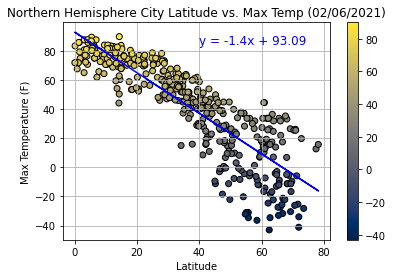

In [20]:
#Northern Max Temp vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Max_Temp']
t = y
north_lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere City Latitude vs. Max Temp ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(40, 85, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_temp_plot.png'
plt.savefig(output_data_file)

The r-value is 0.49531463335317255.


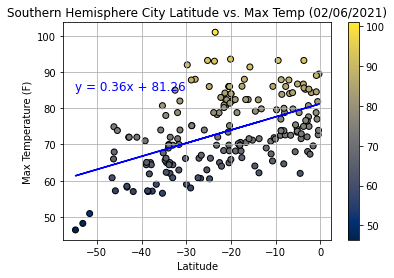

In [21]:
#Southern Max Temp vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Max_Temp']
t = y
south_lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere City Latitude vs. Max Temp ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-55, 85, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_temp_plot.png'
plt.savefig(output_data_file)

In [22]:
#add pair plot observation
lat_temp_plots = 'It appears that in the Northern Hemisphere there is a negative correlation between Latitude and Max_Temp, implying that more northern regions experience colder temperatures. Vice verse we see that the Southern Hemisphere describes a positive weak correlation between latitude and max temp. However, it does appear that cities nearer the hemisphere experience higher temperatures than those farther away.'
print(lat_temp_plots)

It appears that in the Northern Hemisphere there is a negative correlation between Latitude and Max_Temp, implying that more northern regions experience colder temperatures. Vice verse we see that the Southern Hemisphere describes a positive weak correlation between latitude and max temp. However, it does appear that cities nearer the hemisphere experience higher temperatures than those farther away.


The r-value is 0.3232451886192498.


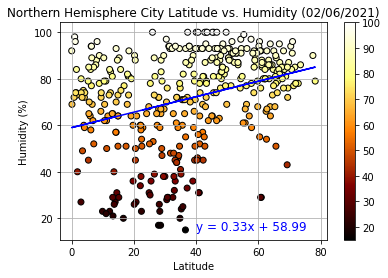

In [23]:
#Northern Humidity vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Humidity']
t = y
north_lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Humidity ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(40, 15, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_humidity_plot.png'
plt.savefig(output_data_file)

The r-value is 0.20043648999498026.


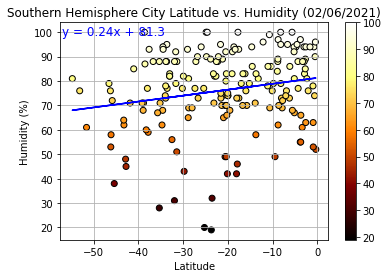

In [24]:
#Southern Humidity vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Humidity']
t = y
south_lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Humidity ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-57, 99, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_humidity_plot.png'
plt.savefig(output_data_file)

In [25]:
#add pair plot observation
lat_humid_plots = 'Despite the weak positive correlation seen in both the Southern and Northern Hemisphere between latitude and humidity, it appears that in the Southern Hemisphere the humidity increases as latitude gets closer to zero/closer to the equator. This is odd as the Northern Hemisphere displays that humidity actually increases farther from the equator.'
print(lat_humid_plots)

Despite the weak positive correlation seen in both the Southern and Northern Hemisphere between latitude and humidity, it appears that in the Southern Hemisphere the humidity increases as latitude gets closer to zero/closer to the equator. This is odd as the Northern Hemisphere displays that humidity actually increases farther from the equator.


The r-value is 0.2357120502802449.


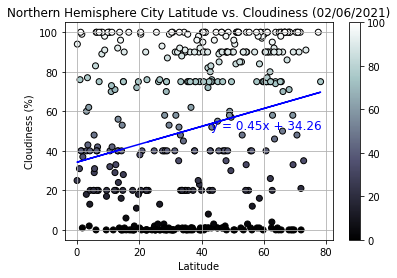

In [26]:
#Northern Cloudiness vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Cloudiness']
t = y
north_lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(43, 51, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_cloudiness_plot.png'
plt.savefig(output_data_file)

The r-value is 0.39340501326963634.


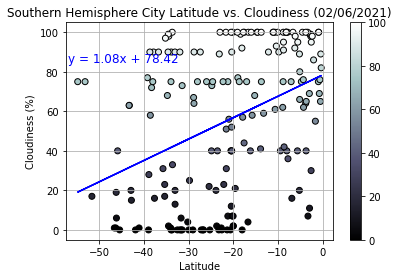

In [27]:
#Southern Cloudiness vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Cloudiness']
t = y
south_lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-57, 85, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_cloudiness_plot.png'
plt.savefig(output_data_file)

In [28]:
#add pair plot observation
lat_cloud_plots = 'Correlation between latitude and cloudiness in either hemisphere is positive, but also quite weak. However, it appears to be slightly more cloudy the farther away from the equator the city is.'
print(lat_cloud_plots)

Correlation between latitude and cloudiness in either hemisphere is positive, but also quite weak. However, it appears to be slightly more cloudy the farther away from the equator the city is.


The r-value is 0.1244450277341589.


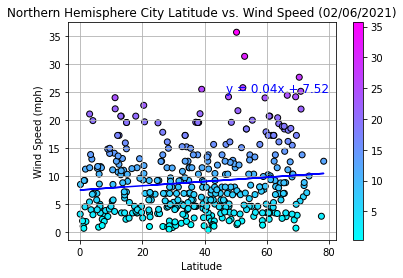

In [29]:
#Northern Wind Speed vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Wind_Speed']
t = y
north_lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(47, 25, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_wind_speed_plot.png'
plt.savefig(output_data_file)

The r-value is -0.2849622199524602.


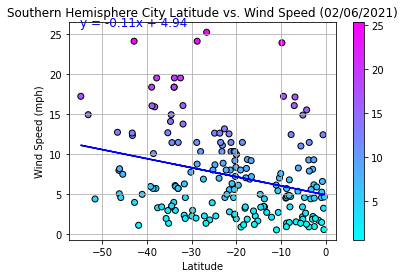

In [30]:
#Southern Wind Speed vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Wind_Speed']
t = y
south_lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-55, 26, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_wind_speed_plot.png'
plt.savefig(output_data_file)

In [37]:
#add pair plot observation
lat_wind_plots = 'From these two scatterplots, it can be seen that there is little to no correlation between wind speed and latitude. Therefore, wind speed cannot be ultimately determined by the closer a city is to the equator. However, despite this evaluation, there is still a slight positive correlation in the Northern Hemisphere, while a slight negative correlation in the Southern Hemisphere, indicating that the farther away from the equator a city is, the wind speed may be slightly greater.'
print(lat_wind_plots)

From these two scatterplots, it can be seen that there is little to no correlation between wind speed and latitude. Therefore, wind speed cannot be ultimately determined by the closer a city is to the equator. However, despite this evaluation, there is still a slight positive correlation in the Northern Hemisphere, while a slight negative correlation in the Southern Hemisphere, indicating that the farther away from the equator a city is, the wind speed may be slightly greater.


In [38]:
#plot observations to csv file
plot_observ = [lat_temp_plots, lat_humid_plots, lat_cloud_plots, lat_wind_plots]
tuples_list = list(zip(plot_observ)) 
plot_observations = pd.DataFrame(tuples_list, columns = ['Scatter_Observations'])

plot_observations.to_csv('output_data/observations/Scatter_Observations.csv', index = False, header = True)

In [39]:
observ_1 = 'Based upon the above graphs, it appears that greatest relationship found is between latitude and maximum temperature. However, other graphs still leave ambiguity as to how latitude (distance from equator) affects humidity, cloudiness, and wind speed. Therefore, perhap a follow-up graph could be created to assess the correlation between minimum temperature or average temperature and latitude.'
observ_2 = 'It seems that looking at the overall latitude vs wind speed scatterplot, it can be seen that the majority of cities have low wind speeds except for a certain few that were typically farther from the equator.'
observ_3 = 'Despite most of the greatest humidity being found around the equator (closer to 0 latitude), there was very low humidity slightly north of the equator. Based on this, it can further assessed what may cause the drop in humidity in these areas.'

print(observ_1)
print(observ_2)
print(observ_3)

Based upon the above graphs, it appears that greatest relationship found is between latitude and maximum temperature. However, other graphs still leave ambiguity as to how latitude (distance from equator) affects humidity, cloudiness, and wind speed. Therefore, perhap a follow-up graph could be created to assess the correlation between minimum temperature or average temperature and latitude.
It seems that looking at the overall latitude vs wind speed scatterplot, it can be seen that the majority of cities have low wind speeds except for a certain few that were typically farther from the equator.
Despite most of the greatest humidity being found around the equator (closer to 0 latitude), there was very low humidity slightly north of the equator. Based on this, it can further assessed what may cause the drop in humidity in these areas.


In [36]:
#observations to csv file
observs = [observ_1, observ_2, observ_3]

tuples_list = list(zip(observs)) 
observations = pd.DataFrame(tuples_list, columns = ['Observations'])

observations.to_csv('output_data/observations/Weather_Observations.csv', index = False, header = True)

['Based upon the above graphs, it appears that greatest relationship found is between latitude and maximum temperature. However, other graphs still leave ambiguity as to how latitude (distance from equator) affects humidity, cloudiness, and wind speed. Therefore, perhap a follow-up graph could be created to assess the correlation between minimum temperature or average temperature and latitude.', 'It seems that looking at the overall latitude vs wind speed scatterplot, it can be seen that the majority of cities have low wind speeds except for a certain few that were typically farther from the equator.', 'Despite most of the greatest humidity being found around the equator (closer to 0 latitude), there was very low humidity slightly north of the equator. Based on this, it can further assessed what may cause the drop in humidity in these areas.']
